
# Cleaning cclass and focus csv files(unclean cclass.csv and unclean focus.csv)

**STEPS**
*   Extracted & Opened unclean cclass.csv and unclean focus.csv files from "Autosalesdata.zip".

*   Saved open file in unclean_cclass and unclean_focus variables for furthure cleaning.

*  **Fill NA Values**-  Replaced missing values (NA) in specified columns with values from other columns. For example, any NA values in the mileage column are replaced with corresponding values from the mileage2 column. This is repeated for fuel type2 and engine size2 columns, pulling data from fuel type and engine size, respectively.

*  **Clear Transferred Values**- After transferring values, this step sets the original source columns (mileage2, fuel type, engine size) to NA where values were identical to those in the target columns. This helps to avoid duplication and keeps the dataset tidy.

*   **Rename Columns**- This step renames columns to likely align with a more standardized or meaningful naming convention for further analysis.
    'engine size2': 'engineSize',
    'fuel type2': 'fuelType',
    'engine size': 'tax',
    'mileage2': 'mpg'

*  **Define and Apply Function** - This custom function adjusts engine sizes in the dataset. It handles strings with "cc", numeric conversions, and corrects anomalies like exceedingly large values by scaling them down.

 Remove currency symbols and commas from numeric columns (price, tax, mileage) to facilitate their conversion to numeric data types for mathematical operations.

*   **Drop Unused Columns** - Here, columns that are no longer necessary (reference, fuel type) are removed from the dataset, likely because they are redundant or irrelevant to the analysis.

*   **Remove Empty Rows** - This final cleaning step removes any rows that are completely empty, which helps reduce the dataset size and improve processing efficiency.

*  Save the cleaned focus and cleaned cclass  to a new CSV file and download.



**This all steps are applied to both files for cleaning the dataset**









In [ ]:
import zipfile
import io
import pandas as pd

# Path to the zip file
zip_file_path = '/content/Autosalesdata.zip'

# Name of the file you want to extract from the zip archive
file_to_extract = 'unclean cclass.csv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Open the specific file within the zip archive
    with zip_ref.open(file_to_extract) as extracted_file:
        # Read the file into a pandas DataFrame
       unclean_cclass= pd.read_csv(extracted_file)


unclean_cclass.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [ ]:
# Fill the NA values from other columns
unclean_cclass['mileage'].fillna(unclean_cclass['mileage2'], inplace=True)
unclean_cclass['fuel type2'].fillna(unclean_cclass['fuel type'], inplace=True)
unclean_cclass['engine size2'].fillna(unclean_cclass['engine size'], inplace=True)

# Set the transferred values in the original columns to NA
unclean_cclass.loc[unclean_cclass['mileage'] == unclean_cclass['mileage2'], 'mileage2'] = pd.NA
unclean_cclass.loc[unclean_cclass['fuel type2'] == unclean_cclass['fuel type'], 'fuel type'] = pd.NA
unclean_cclass.loc[unclean_cclass['engine size2'] == unclean_cclass['engine size'], 'engine size'] = pd.NA

# Rename the specified columns
unclean_cclass = unclean_cclass.rename(columns={
    'engine size2': 'engineSize',
    'fuel type2': 'fuelType',
    'engine size': 'tax',
    'mileage2': 'mpg'
})

# Define the function to correct the engine size including the new requirement
def correct_engine_size(size):
    try:
        if isinstance(size, str):
            size = size.lower()
            if "cc" in size:
                size = float(size.replace("cc", "")) / 1000
            elif size == "unknown":
                return 0
            else:
                size = float(size)
        if size >= 1000:
            return size / 1000
        else:
            return size
    except ValueError:
        return size

# Correct the engineSize column
unclean_cclass['engineSize'] = unclean_cclass['engineSize'].apply(correct_engine_size)

# Remove the £ sign and commas from the column
unclean_cclass['price'] = unclean_cclass['price'].str.replace('£', '').str.replace(',', '')
unclean_cclass['tax'] = unclean_cclass['tax'].str.replace('£', '')
unclean_cclass['mileage'] = unclean_cclass['mileage'].str.replace(',', '')

# Drop the reference column
unclean_cclass = unclean_cclass.drop(columns=['reference'])
unclean_cclass = unclean_cclass.drop(columns=['fuel type'])

# Remove any extra empty rows
unclean_cclass = unclean_cclass.dropna(how='all')

In [ ]:
unclean_cclass.head(20)


,model,year,price,transmission,mileage,tax,mpg,fuelType,engineSize
0,C Class,2020.0,30495,Automatic,1200,<NA>,<NA>,Diesel,2.000
1,C Class,2020.0,29989,Automatic,1000,<NA>,<NA>,Petrol,1.500
2,C Class,2020.0,37899,Automatic,500,<NA>,<NA>,Diesel,2.000
3,C Class,2019.0,30399,Automatic,5000,<NA>,<NA>,Diesel,2.000
4,C Class,2019.0,29899,Automatic,4500,<NA>,<NA>,Diesel,2.000
5,C Class,2020.0,30999,Automatic,1000,<NA>,<NA>,Diesel,2.000
6,C Class,2020.0,35999,Automatic,500,<NA>,<NA>,Diesel,2.000
7,C Class,2019.0,37990,Automatic,1412,<NA>,<NA>,Petrol,3.000
8,C Class,2019.0,28990,Automatic,3569,<NA>,<NA>,Diesel,2.000
9,C Class,2019.0,28990,Automatic,3635,<NA>,<NA>,Diesel,2.000


In [ ]:
# Save the cleaned cclass  to a new CSV file
cleaned_file_path = '/content/cleaned_cclass.csv'
unclean_cclass.to_csv(cleaned_file_path, index=False)


In [ ]:
import zipfile
import io
import pandas as pd

# Path to the zip file
zip_file_path = '/content/Autosalesdata.zip'

# Name of the file you want to extract from the zip archive
file_to_extract = 'unclean focus.csv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Open the specific file within the zip archive
    with zip_ref.open(file_to_extract) as extracted_file:
        # Read the file into a pandas DataFrame
       unclean_focus= pd.read_csv(extracted_file)


unclean_focus.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057


In [ ]:
# Fill the NA values from other columns
unclean_focus['mileage'].fillna(unclean_focus['mileage2'], inplace=True)
unclean_focus['fuel type2'].fillna(unclean_focus['fuel type'], inplace=True)
unclean_focus['engine size2'].fillna(unclean_focus['engine size'], inplace=True)

# Set the transferred values in the original columns to NA
unclean_focus.loc[unclean_focus['mileage'] == unclean_focus['mileage2'], 'mileage2'] = pd.NA
unclean_focus.loc[unclean_focus['fuel type2'] == unclean_focus['fuel type'], 'fuel type'] = pd.NA
unclean_focus.loc[unclean_focus['engine size2'] == unclean_focus['engine size'], 'engine size'] = pd.NA

# Rename the specified columns
unclean_focus = unclean_focus.rename(columns={
    'engine size2': 'engineSize',
    'fuel type2': 'fuelType',
    'engine size': 'tax',
    'mileage2': 'mpg'
})

# Function to convert incorrect entries to decimal
def correct_engine_size(size):
    try:
        if float(size) >= 999:  # assuming entries above 1000 are incorrect
            return float(size) / 1000
        else:
            return float(size)
    except ValueError:
        return size

# Correct the engineSize column
unclean_focus['engineSize'] = unclean_focus['engineSize'].apply(correct_engine_size)

# Remove the £ sign from the price and tax column
unclean_focus['price'] = unclean_focus['price'].str.replace('£', '').str.replace(',', '')
unclean_focus['tax'] = unclean_focus['tax'].str.replace('£', '')
unclean_focus['mileage'] = unclean_focus['mileage'].str.replace(',', '')

# Drop the reference column and fuel type column
unclean_focus = unclean_focus.drop(columns=['reference', 'fuel type'])

# Remove any extra empty rows
unclean_focus = unclean_focus.dropna(how='all')

In [ ]:
# Save the cleaned focus  to a new CSV file
cleaned_file_path = '/content/cleaned_focus.csv'
unclean_focus.to_csv(cleaned_file_path, index=False)

In [ ]:
unclean_focus.head(20)

,model,year,price,transmission,mileage,tax,mpg,fuelType,engineSize
0,Focus,2016.0,8000,Manual,38852,<NA>,<NA>,Petrol,0.999
1,Focus,2019.0,13400,Manual,11952,<NA>,<NA>,Petrol,0.999
2,Focus,2019.0,14600,Manual,22142,<NA>,<NA>,Petrol,1.498
3,Focus,2016.0,9450,Manual,14549,<NA>,<NA>,Diesel,1.56
4,Focus,2015.0,9999,Manual,7010,<NA>,<NA>,Diesel,1.56
5,Focus,2016.0,10699,Automatic,26796,<NA>,<NA>,Petrol,0.999
6,Focus,2018.0,12849,Manual,16128,<NA>,<NA>,Petrol,1.0
7,Focus,2020.0,24999,Manual,4900,<NA>,<NA>,Petrol,2.3
8,Focus,2018.0,11999,Manual,30953,<NA>,<NA>,Petrol,1.498
9,Focus,2019.0,19500,Manual,3000,<NA>,<NA>,Diesel,1.5


# Adding the cleaned filed to Autosalesdata.zip


*   **import necessary Python libraries**:
zipfile for handling zip files.
pandas for data manipulation, though it's imported here but not used in the provided script.
os for interacting with the operating system, such as path operations and directory traversal.

*  **Define File Paths**- This step sets up file paths for the ZIP file containing the original data and paths for the cleaned data files.

*   **Define Extraction Directory**- Here, a directory path is specified where the contents of the ZIP file will be extracted. This serves as a temporary working space.

*   **Extract Files from the ZIP**- This code block opens the ZIP file in read mode ('r') and extracts all its contents into the specified extraction directory. The use of a context manager (with) ensures that the ZIP file is properly closed after its contents are extracted.

*   **Create a New ZIP and Modify Contents **- The script re-opens the original ZIP file but in write mode ('w'), which clears the existing contents.

It uses os.walk() to traverse all directories and files within the extracted directory.

For each file, it checks the file name. If it matches 'unclean focus.csv', it writes the cleaned Focus file (cleaned_focus_file_path) into the ZIP with a new name 'clean focus.csv'. Similarly, it does the same for 'unclean cclass.csv'.

All other files are added back into the ZIP without modification. The arcname parameter specifies the path within the ZIP archive, ensuring files retain their original directory structure or are renamed appropriately.

In [ ]:
import zipfile
import pandas as pd
import os

# Define the paths to the original and cleaned files
original_zip_file_path = '/content/Autosalesdata.zip'
cleaned_focus_file_path = '/content/cleaned_focus.csv'
cleaned_cclass_file_path = '/content/cleaned_cclass.csv'

# Define temporary extraction directory
extraction_dir = '/content/extracted'

# Extract all files from the zip
with zipfile.ZipFile(original_zip_file_path, 'r') as zipf:
    zipf.extractall(extraction_dir)

# Create a new zip file and add all original files, replacing the specific ones with cleaned versions
with zipfile.ZipFile(original_zip_file_path, 'w') as zipf:
    for foldername, subfolders, filenames in os.walk(extraction_dir):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            if filename == 'unclean focus.csv':
                zipf.write(cleaned_focus_file_path, arcname='clean focus.csv')
            elif filename == 'unclean cclass.csv':
                zipf.write(cleaned_cclass_file_path, arcname='clean cclass.csv')
            else:
                zipf.write(file_path, arcname=filename)

# Confirm the files have been overwritten in the zip
original_zip_file_path



FileNotFoundError: [Errno 2] No such file or directory: '/content/Autosalesdata.zip'

# Extracting the modified and cleaned files from Autosalesdata.zip

In [ ]:
import zipfile
import os
# Define the path to the uploaded zip file
zip_file_path = '/content/Clean_Autosalesdata.zip'

# Define the extraction directory
extraction_path = '/content/Extracted_files/'

# Create the extraction directory if it does not exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)
print('Extraction completed.')

Extraction completed.


# Adding brand column

The function get_brand_from_filename takes a file name as input.
os.path.splitext(filename)[0]: Removes the file extension (e.g., .csv) from the file name.
.lower(): Converts the file name to lower case to handle case insensitivity.
brand_mappings.get(basename, basename.capitalize()): Checks if the basename exists in the brand_mappings dictionary. If it exists, it returns the corresponding brand. If it doesn't exist, it capitalizes the basename and returns it.

zipfile.ZipFile('/content/Clean_Autosalesdata.zip', 'r'): Opens the ZIP file for reading.
z.namelist(): Lists all the files in the ZIP archive.
if filename.endswith('.csv'): Checks if the file has a .csv extension.
get_brand_from_filename(filename): Determines the brand from the file name.
z.open(filename): Opens the CSV file inside the ZIP archive.
pd.read_csv(f): Reads the CSV file into a DataFrame.
df['brand'] = brand: Adds a new column brand to the DataFrame with the determined brand name.
key = filename.replace('.csv', ''): Removes the .csv extension from the file name to use as a key.
dataframes[key] = df: Stores the DataFrame in the dataframes dictionary with the key being the file name without the .csv extension.



In [ ]:
import pandas as pd
import zipfile
import os
# Define a function to determine the brand from the file name
def get_brand_from_filename(filename):
    brand_mappings = {
        'cclass': 'Merc',
        'focus': 'Ford',
        'clean cclass': 'Merc',
        'clean focus': 'Ford'
    }
    basename = os.path.splitext(filename)[0].lower()  # Remove .csv and convert to lower case
    return brand_mappings.get(basename, basename.capitalize())

# Initialize a dictionary to store DataFrames
dataframes = {}
# Open the zip file
with zipfile.ZipFile('/content/Clean_Autosalesdata.zip', 'r') as z:
    # Loop through each file in the zip
    for filename in z.namelist():
        if filename.endswith('.csv'):
            # Extract the brand name
            brand = get_brand_from_filename(filename)
            # Read the CSV file
            with z.open(filename) as f:
                df = pd.read_csv(f)
                # Add the brand column
                df['brand'] = brand
                # Store the DataFrame in the dictionary
                key = os.path.basename(filename).replace('.csv', '')
                dataframes[key] = df


In [ ]:
# Example: Accessing a specific DataFrame
print(dataframes.keys())  # Print the keys to see the different DataFrames
for key, df in dataframes.items():
    print(f"DataFrame for {key}:")
    print(df.head())

dict_keys(['clean cclass', 'bmw', 'audi', 'skoda', 'vw', 'hyundi', 'toyota', 'focus', 'ford', 'merc', 'vauxhall', 'clean focus', 'cclass'])
DataFrame for clean cclass:
      model    year  price transmission mileage  tax  mpg fuelType  \
0   C Class  2020.0  30495    Automatic    1200  NaN  NaN   Diesel   
1   C Class  2020.0  29989    Automatic    1000  NaN  NaN   Petrol   
2   C Class  2020.0  37899    Automatic     500  NaN  NaN   Diesel   
3   C Class  2019.0  30399    Automatic    5000  NaN  NaN   Diesel   
4   C Class  2019.0  29899    Automatic    4500  NaN  NaN   Diesel   

   engineSize brand  
0         2.0  Merc  
1         1.5  Merc  
2         2.0  Merc  
3         2.0  Merc  
4         2.0  Merc  
DataFrame for bmw:
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794

# Merging the extracted files

The loop iterates over each item in the dataframes dictionary.
It checks if the filename is not in the excluded_files set.
If the filename is not excluded, it adds the corresponding DataFrame (df) to the merged_dataframes list.
It also adds the filename to the merged_filenames list to keep track of the merged files.

concatenates all the DataFrames in the merged_dataframes list into a single DataFrame (merged_df).
The ignore_index=True parameter ensures that the resulting DataFrame has a continuous index.

saves the merged DataFrame to a CSV file with the specified output_path.
The index=False parameter ensures that the index is not saved to the CSV file.

This prints the number of merged CSV files and their filenames.
The len(merged_filenames) gives the count of the merged files.
The loop iterates over the merged_filenames list and prints each filename.


In [ ]:
#Merging files
# Exclude specific files
excluded_files = {'focus', 'cclass'}

# Initialize a list to store DataFrames for merging and names of files
merged_dataframes = []
merged_filenames = []

# Filter out the CSV files and exclude the specific ones
for filename, df in dataframes.items():
    if filename not in excluded_files:
        merged_dataframes.append(df)
        merged_filenames.append(filename)

# Concatenate all DataFrames
merged_df = pd.concat(merged_dataframes, ignore_index=True)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Save the merged DataFrame to a CSV file
output_path = 'Merged_AutomobileData.csv'
merged_df.to_csv(output_path, index=False)

# Print the merged file information
print(f'Merged {len(merged_filenames)} CSV files into {output_path}')
print('Merged files:')
for file in merged_filenames:
    print(file)

      model    year  price transmission mileage  tax  mpg fuelType engineSize  \
0   C Class  2020.0  30495    Automatic    1200  NaN  NaN   Diesel        2.0   
1   C Class  2020.0  29989    Automatic    1000  NaN  NaN   Petrol        1.5   
2   C Class  2020.0  37899    Automatic     500  NaN  NaN   Diesel        2.0   
3   C Class  2019.0  30399    Automatic    5000  NaN  NaN   Diesel        2.0   
4   C Class  2019.0  29899    Automatic    4500  NaN  NaN   Diesel        2.0   

  brand  tax(£)  
0  Merc     NaN  
1  Merc     NaN  
2  Merc     NaN  
3  Merc     NaN  
4  Merc     NaN  
Merged 11 CSV files into Merged_AutomobileData.csv
Merged files:
clean cclass
bmw
audi
skoda
vw
hyundi
toyota
ford
merc
vauxhall
clean focus


# DATA CLEANING
Reading Merged_AutomobileData.csv from previous block of code

In [ ]:
import pandas as pd
Carsdata= pd.read_csv('/content/Merged_AutomobileData.csv')
print(Carsdata.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'tax', 'mpg',
       'fuelType', 'engineSize', 'brand', 'tax(£)'],
      dtype='object')


<ipython-input-1-78619fd288ad>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  Carsdata= pd.read_csv('/content/Merged_AutomobileData.csv')


In [ ]:
#make the brand column the first column and rename the short names of brands to their full names
# Rename the short brand names to full names
brand_full_names = {
    'Merc': 'Mercedes-Benz',
    'Vw': 'Volkswagen',
    'Bmw': 'BMW',
    'Hyundi': 'Hyundai'
}

Carsdata['brand'] = Carsdata['brand'].replace(brand_full_names)

# Move the 'brand' column to the first position
cols = list(Carsdata.columns)
cols.insert(0, cols.pop(cols.index('brand')))
Carsdata= Carsdata[cols]




In [ ]:
# Display the first few rows
print(Carsdata.head())

           brand     model    year  price transmission mileage  tax  mpg  \
0  Mercedes-Benz   C Class  2020.0  30495    Automatic    1200  NaN  NaN   
1  Mercedes-Benz   C Class  2020.0  29989    Automatic    1000  NaN  NaN   
2  Mercedes-Benz   C Class  2020.0  37899    Automatic     500  NaN  NaN   
3  Mercedes-Benz   C Class  2019.0  30399    Automatic    5000  NaN  NaN   
4  Mercedes-Benz   C Class  2019.0  29899    Automatic    4500  NaN  NaN   

  fuelType engineSize  tax(£)  
0   Diesel        2.0     NaN  
1   Petrol        1.5     NaN  
2   Diesel        2.0     NaN  
3   Diesel        2.0     NaN  
4   Diesel        2.0     NaN  


In [ ]:
print(Carsdata.dtypes)

brand            object
model            object
year            float64
price             int64
transmission     object
mileage          object
tax             float64
mpg             float64
fuelType         object
engineSize       object
tax(£)          float64
dtype: object


In [ ]:
# Convert 'year' to integer, 'price' to float
Carsdata['year'] = pd.to_numeric(Carsdata['year'], errors='coerce').astype('Int64')
Carsdata['price'] = pd.to_numeric(Carsdata['price'], errors='coerce').astype('float64')

In [ ]:
# Identify non-numeric values in 'mileage'
non_numeric_mileage = Carsdata[~Carsdata['mileage'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print("Non-numeric values in 'mileage':")
print(non_numeric_mileage[['model', 'mileage']])

# Identify non-numeric values in 'engineSize'
non_numeric_engineSize = Carsdata[~Carsdata['engineSize'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print("Non-numeric values in 'engineSize':")
print(non_numeric_engineSize[['model', 'engineSize']])

Non-numeric values in 'mileage':
           model  mileage
3790     C Class  Unknown
3822     C Class  Unknown
3823     C Class  Unknown
3843     C Class  Unknown
107862     Focus  Unknown
Non-numeric values in 'engineSize':
         model engineSize
106781   Focus    1560 cc
107694   Focus    1596 cc
107843   Focus    Unknown
107859   Focus    Unknown
107860   Focus    Unknown
107862   Focus    Unknown
108013   Focus    Unknown
108465   Focus       1.0T
108501   Focus    2,00 cc


In [ ]:
# Convert non-numeric 'mileage' and 'engineSize' to NaN
Carsdata['mileage'] = pd.to_numeric(Carsdata['mileage'], errors='coerce')
Carsdata['engineSize'] = pd.to_numeric(Carsdata['engineSize'], errors='coerce')

# Verify the data types and missing values after conversion
print(Carsdata.dtypes)


brand            object
model            object
year              Int64
price           float64
transmission     object
mileage         float64
tax             float64
mpg             float64
fuelType         object
engineSize      float64
tax(£)          float64
dtype: object


In [ ]:
# Check for null values
null_values = Carsdata.isna().sum()
print("Null values in each column:\n", null_values)


Null values in each column:
 brand                0
model                0
year                92
price                0
transmission         0
mileage              5
tax               5888
mpg                974
fuelType             0
engineSize           9
tax(£)          103782
dtype: int64


In [ ]:
# Check for blank values
blank_values = (Carsdata == '').sum()
print("Blank values in each column:\n", blank_values)

Blank values in each column:
 brand           0
model           0
year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
fuelType        0
engineSize      0
tax(£)          0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import re

# Function to count inconsistent values
def count_inconsistent_values(column):
    # Replace 'Unknown' with NaN and count
    unknown_count = (column == 'Unknown').sum()

    # Count non-numeric values
    non_numeric_count = column.apply(lambda x: bool(re.search(r'[^\d.]', str(x))) if pd.notna(x) else False).sum()

    return unknown_count, non_numeric_count

# List of columns intended to be numeric
numeric_columns = ['mileage', 'engineSize', 'year', 'price', 'tax', 'mpg']

# Dictionary to store counts of inconsistencies
inconsistent_values_count = {}

# Check each numeric column for inconsistencies
for column in numeric_columns:
    if column in Carsdata.columns:
        unknown_count, non_numeric_count = count_inconsistent_values(Carsdata[column])
        inconsistent_values_count[column] = {'Unknown Count': unknown_count, 'Non-Numeric Count': non_numeric_count}

# Print the summary of inconsistencies
print("Summary of inconsistencies in numeric columns:")
for column, counts in inconsistent_values_count.items():
    print(f"{column}: {counts}")


Summary of inconsistencies in numeric columns:
mileage: {'Unknown Count': 0, 'Non-Numeric Count': 0}
engineSize: {'Unknown Count': 0, 'Non-Numeric Count': 0}
year: {'Unknown Count': 0, 'Non-Numeric Count': 0}
price: {'Unknown Count': 0, 'Non-Numeric Count': 0}
tax: {'Unknown Count': 0, 'Non-Numeric Count': 0}
mpg: {'Unknown Count': 0, 'Non-Numeric Count': 0}


In [ ]:
# Print the data types and verify missing values
print(Carsdata.dtypes)
print(Carsdata.isna().sum())

brand            object
model            object
year              Int64
price           float64
transmission     object
mileage         float64
tax             float64
mpg             float64
fuelType         object
engineSize      float64
tax(£)          float64
dtype: object
brand                0
model                0
year                92
price                0
transmission         0
mileage              5
tax               5888
mpg                974
fuelType             0
engineSize           9
tax(£)          103782
dtype: int64


In [ ]:
# Fill missing values in the 'tax' column with values from the 'tax(Â£)' column
Carsdata['tax'].fillna(Carsdata['tax(£)'], inplace=True)

# Drop the 'tax(Â£)' column if no longer needed
Carsdata.drop(columns=['tax(£)'], inplace=True)

# Display the updated DataFrame
print(Carsdata)

                brand     model  year    price transmission  mileage  tax  \
0       Mercedes-Benz   C Class  2020  30495.0    Automatic   1200.0  NaN   
1       Mercedes-Benz   C Class  2020  29989.0    Automatic   1000.0  NaN   
2       Mercedes-Benz   C Class  2020  37899.0    Automatic    500.0  NaN   
3       Mercedes-Benz   C Class  2019  30399.0    Automatic   5000.0  NaN   
4       Mercedes-Benz   C Class  2019  29899.0    Automatic   4500.0  NaN   
...               ...       ...   ...      ...          ...      ...  ...   
108637           Ford     Focus  2019  18745.0       Manual   7855.0  NaN   
108638           Ford     Focus  2019  16350.0       Manual  13891.0  NaN   
108639           Ford     Focus  2019  16850.0       Manual  13452.0  NaN   
108640           Ford     Focus  2019  17310.0    Automatic  13376.0  NaN   
108641           Ford     Focus  2019  17610.0    Automatic   7886.0  NaN   

        mpg fuelType  engineSize  
0       NaN   Diesel         2.0  
1    

In [ ]:
#Analysis of the Distributions
#Mileage:The distribution of mileage is heavily skewed to the right, and the boxplot shows a significant number of outliers.
#Given this skewness and presence of outliers, the median is a more appropriate measure for imputation.
#Engine Size:The distribution of engineSize shows some extreme outliers.The median would also be more appropriate for engineSize due to these outliers.

# Impute missing values for 'mileage' and 'engineSize' with the median
Carsdata['mileage'].fillna(Carsdata['mileage'].median(), inplace=True)
Carsdata['engineSize'].fillna(Carsdata['engineSize'].median(), inplace=True)


In [ ]:
# Round float columns to 1 decimal point if they have more than 1 decimal point
float_columns = Carsdata.select_dtypes(include=['float64']).columns

# Round the specified columns
Carsdata[float_columns] = Carsdata[float_columns].round(1)

# Display the first few rows to confirm the changes
Carsdata[float_columns].head()


,price,mileage,tax,mpg,engineSize
0,30495.0,1200.0,NaN,NaN,2.0
1,29989.0,1000.0,NaN,NaN,1.5
2,37899.0,500.0,NaN,NaN,2.0
3,30399.0,5000.0,NaN,NaN,2.0
4,29899.0,4500.0,NaN,NaN,2.0


In [ ]:
# Find rows where engineSize is 0.0 and fuelType is not electric
Carsdata_invalid = Carsdata[
    (Carsdata['engineSize'] == 0.0) &
    (Carsdata['fuelType'] != 'electric')
]

# Display the relevant columns
Carsdata_invalid

,brand,model,year,price,transmission,mileage,tax,mpg,fuelType,engineSize
3336,Mercedes-Benz,C Class,2014,14750.0,Manual,57062.0,NaN,44.1,Diesel,0.0
3429,Mercedes-Benz,C Class,2017,19995.0,Automatic,8020.0,145.0,49.6,Petrol,0.0
4528,BMW,i3,2017,19998.0,Automatic,41949.0,140.0,470.8,Hybrid,0.0
4685,BMW,i3,2017,19998.0,Automatic,41146.0,0.0,470.8,Hybrid,0.0
4687,BMW,i3,2017,21898.0,Automatic,10839.0,0.0,470.8,Hybrid,0.0
...,...,...,...,...,...,...,...,...,...,...
107669,Ford,Focus,2015,9072.0,Manual,23000.0,20.0,58.9,Petrol,0.0
107670,Ford,Focus,2013,8999.0,Manual,34000.0,150.0,47.1,Petrol,0.0
107671,Ford,Focus,2015,9170.0,Manual,28000.0,20.0,61.4,Petrol,0.0
107737,Ford,Focus,2017,9790.0,Manual,23000.0,20.0,60.1,Petrol,0.0


In [ ]:
#Implementation with randomforest for predicting missing year
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data for 'year' prediction
data_year = Carsdata.dropna(subset=['year'])  # Drop rows where 'year' is missing
X_year = data_year.drop(columns=['year'])
y_year = data_year['year']

# Encode categorical variables
X_year = pd.get_dummies(X_year)

# Ensure the same columns are in the missing year features
missing_year = Carsdata[Carsdata['year'].isnull()]
missing_year_features = pd.get_dummies(missing_year.drop(columns=['year']))
missing_year_features = missing_year_features.reindex(columns=X_year.columns, fill_value=0)

# Ensure no NaNs are present in the training data
X_year = X_year.fillna(0)
missing_year_features = missing_year_features.fillna(0)
# Split the data into training and testing sets
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_year, y_year, test_size=0.2, random_state=42)

# Train the model
model_year = RandomForestRegressor(n_estimators=100, random_state=42)
model_year.fit(X_train_year, y_train_year)

# Predict missing 'year' values
predicted_year = model_year.predict(missing_year_features)

# Round the predicted 'year' values and convert to integers
predicted_year = predicted_year.round().astype(int)

# Impute the missing 'year' values
Carsdata.loc[Carsdata['year'].isnull(), 'year'] = predicted_year
# Verify the model performance
print(f"Random Forest Regressor R^2 score for year: {model_year.score(X_test_year, y_test_year)}")
# Print the predicted 'year' values
print("Predicted 'year' values :")
print(predicted_year)


Random Forest Regressor R^2 score for year: 0.9146204483742482
Predicted 'year' values :
[2016 2015 2018 2016 2017 2019 2018 2018 2017 2015 2018 2016 2018 2019
 2016 2017 2014 2018 2017 2011 2017 2016 2018 2016 2018 2018 2017 2019
 2017 2013 2019 2018 2018 2016 2018 2018 2019 2019 2019 2018 2019 2019
 2019 2019 2019 2019 2019 2018 2016 2018 2018 2016 2019 2019 2019 2019
 2019 2019 2018 2016 2019 2019 2017 2018 2016 2018 2017 2017 2016 2019
 2018 2018 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2017
 2017 2018 2017 2017 2019 2017 2017 2016]


In [ ]:
#imputing tax using randomforestregressor
# Prepare data for 'tax' prediction
data_tax = Carsdata.dropna(subset=['tax'])  # Drop rows where 'tax' is missing
X_tax = data_tax.drop(columns=['tax'])
y_tax = data_tax['tax']

# Encode categorical variables
X_tax = pd.get_dummies(X_tax)

# Ensure the same columns are in the missing tax features
missing_tax = Carsdata[Carsdata['tax'].isnull()]
missing_tax_features = pd.get_dummies(missing_tax.drop(columns=['tax']))
missing_tax_features = missing_tax_features.reindex(columns=X_tax.columns, fill_value=0)

# Ensure no NaNs are present in the training data
X_tax = X_tax.fillna(0)
missing_tax_features = missing_tax_features.fillna(0)

# Split the data into training and testing sets
X_train_tax, X_test_tax, y_train_tax, y_test_tax = train_test_split(X_tax, y_tax, test_size=0.2, random_state=42)

# Train the model
model_tax = RandomForestRegressor(n_estimators=100, random_state=42)
model_tax.fit(X_train_tax, y_train_tax)

# Predict missing 'tax' values
predicted_tax = model_tax.predict(missing_tax_features)

# Impute the missing 'tax' values
Carsdata.loc[Carsdata['tax'].isnull(), 'tax'] = predicted_tax

# Verify the model performance
print(f"Random Forest Regressor R^2 score for tax : {model_tax.score(X_test_tax, y_test_tax)}")

# Print the predicted 'tax' values
print("Predicted 'tax' values :")
print(predicted_tax)

Random Forest Regressor R^2 score for tax : 0.8710838717598526
Predicted 'tax' values :
[146.05 145.55 144.9  ... 145.75 145.5  147.45]


In [ ]:
#imputing mpg using randomforestregressor
# Prepare data for 'mpg' prediction
data_mpg = Carsdata.dropna(subset=['mpg'])  # Drop rows where 'mpg' is missing
X_mpg = data_mpg.drop(columns=['mpg'])
y_mpg = data_mpg['mpg']

# Encode categorical variables
X_mpg = pd.get_dummies(X_mpg)

# Ensure the same columns are in the missing mpg features
missing_mpg = Carsdata[Carsdata['mpg'].isnull()]
missing_mpg_features = pd.get_dummies(missing_mpg.drop(columns=['mpg']))
missing_mpg_features = missing_mpg_features.reindex(columns=X_mpg.columns, fill_value=0)

# Ensure no NaNs are present in the training data
X_mpg = X_mpg.fillna(0)
missing_mpg_features = missing_mpg_features.fillna(0)

# Split the data into training and testing sets
X_train_mpg, X_test_mpg, y_train_mpg, y_test_mpg = train_test_split(X_mpg, y_mpg, test_size=0.2, random_state=42)

# Train the model
model_mpg = RandomForestRegressor(n_estimators=100, random_state=42)
model_mpg.fit(X_train_mpg, y_train_mpg)

# Predict missing 'mpg' values
predicted_mpg = model_mpg.predict(missing_mpg_features)

# Impute the missing 'mpg' values
Carsdata.loc[Carsdata['mpg'].isnull(), 'mpg'] = predicted_mpg

# Verify the model performance
print(f"Random Forest Regressor R^2 score for mpg: {model_mpg.score(X_test_mpg, y_test_mpg)}")

# Print the predicted 'mpg' values
print("Predicted 'mpg' values :")
print(predicted_mpg)


Random Forest Regressor R^2 score for mpg: 0.9495594907528866
Predicted 'mpg' values :
[ 63.726   46.206   51.51    62.324   61.65    63.607   55.845   30.183
  62.203   61.689   40.534   39.167   39.11    40.499   46.584   50.091
  40.615   39.167   40.615   29.494   39.167   40.615   50.091   45.951
  34.413   59.15    49.698   46.3     43.274   40.266   42.044   40.111
  40.615   40.615   63.566   29.838   53.33    48.946   39.093   40.167
  40.127   50.241   39.973   40.56    39.093   41.914   42.061   34.355
  42.192   42.715   40.093   42.193   39.132   36.971   40.615   63.439
  42.028   42.069   32.762   39.167   50.091   40.615   39.167   50.091
  40.615   32.006   62.429   42.186   29.681   29.641   48.969   40.615
  50.091   39.167   40.615   50.091   42.087   30.143   22.116   42.049
  42.052   39.167   39.167   40.615   50.091   63.569   40.615   49.361
  42.19    39.167   39.167   40.615   50.091   39.167   40.615   50.091
  59.462   22.778   33.797   29.618   34.292   44

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Prepare the data
valid_engine_entries = Carsdata[
    (Carsdata['engineSize'] != 0.0) &
    (Carsdata['fuelType'] != 'electric')
]
invalid_engine_entries = Carsdata[
    (Carsdata['engineSize'] == 0.0) &
    (Carsdata['fuelType'] != 'electric')
]

#  Features and target
X_valid = valid_engine_entries.drop(columns=['engineSize'])
y_valid = valid_engine_entries['engineSize']
X_invalid = invalid_engine_entries.drop(columns=['engineSize'])

# Encode categorical features if necessary
categorical_features = ['brand', 'model', 'fuelType', 'transmission']
numeric_features = X_valid.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=42)

# Train a regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# Predict the missing values
y_pred_invalid = model.predict(X_invalid)

# Update the invalid entries with predicted values
invalid_engine_entries['engineSize'] = y_pred_invalid

<ipython-input-23-36a4665b5c44>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_engine_entries['engineSize'] = y_pred_invalid


In [ ]:
# Combine the data back together
Carsdata = pd.concat([valid_engine_entries, invalid_engine_entries])
# Display the first few rows to confirm the changes
print(Carsdata.head(10))

           brand     model  year    price transmission  mileage     tax  \
0  Mercedes-Benz   C Class  2020  30495.0    Automatic   1200.0  146.05   
1  Mercedes-Benz   C Class  2020  29989.0    Automatic   1000.0  145.55   
2  Mercedes-Benz   C Class  2020  37899.0    Automatic    500.0  144.90   
3  Mercedes-Benz   C Class  2019  30399.0    Automatic   5000.0  145.90   
4  Mercedes-Benz   C Class  2019  29899.0    Automatic   4500.0  145.25   
5  Mercedes-Benz   C Class  2020  30999.0    Automatic   1000.0  145.30   
6  Mercedes-Benz   C Class  2020  35999.0    Automatic    500.0  144.90   
7  Mercedes-Benz   C Class  2019  37990.0    Automatic   1412.0  147.45   
8  Mercedes-Benz   C Class  2019  28990.0    Automatic   3569.0  144.85   
9  Mercedes-Benz   C Class  2019  28990.0    Automatic   3635.0  144.85   

      mpg fuelType  engineSize  
0  63.726   Diesel         2.0  
1  46.206   Petrol         1.5  
2  51.510   Diesel         2.0  
3  62.324   Diesel         2.0  
4  61.650

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Prepare the data
valid_tax_entries = Carsdata[Carsdata['tax'] != 0]
invalid_tax_entries = Carsdata[Carsdata['tax'] == 0]

# Features and target
X_valid_tax = valid_tax_entries.drop(columns=['tax'])
y_valid_tax = valid_tax_entries['tax']
X_invalid_tax = invalid_tax_entries.drop(columns=['tax'])

# Encode categorical features if necessary
categorical_features = ['brand', 'model', 'fuelType', 'transmission']
numeric_features = X_valid_tax.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
X_train_tax, X_test_tax, y_train_tax, y_test_tax = train_test_split(X_valid_tax, y_valid_tax, test_size=0.2, random_state=42)

# Train a regression model
tax_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

tax_model.fit(X_train_tax, y_train_tax)

# Predict the missing values
y_pred_invalid_tax = tax_model.predict(X_invalid_tax)

# Update the invalid entries with predicted values
invalid_tax_entries['tax'] = y_pred_invalid_tax

# Combine the data back together
Carsdata = pd.concat([valid_tax_entries, invalid_tax_entries])




<ipython-input-26-a98a5a540bbb>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_tax_entries['tax'] = y_pred_invalid_tax


In [ ]:
# Verify the model performance
print(f"Random Forest Regressor R^2 score for engineSize: {tax_model.score(X_test_tax, y_test_tax)}")


Random Forest Regressor R^2 score for engineSize: 0.8808665738159219


In [ ]:
# Check for missing values
print(Carsdata.isnull().sum())

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
fuelType        0
engineSize      0
dtype: int64


In [ ]:
print(Carsdata.dtypes)

brand            object
model            object
year              Int64
price           float64
transmission     object
mileage         float64
tax             float64
mpg             float64
fuelType         object
engineSize      float64
dtype: object


In [ ]:
# Sort the dataset by brand, model, and year in ascending order
Carsdata = Carsdata.sort_values(by=['brand', 'model', 'year'], ascending=[True, True, True])
# Display the first few rows to confirm the sorting
Carsdata

,brand,model,year,price,transmission,mileage,tax,mpg,fuelType,engineSize
25320,Audi,A1,2010,9990.0,Automatic,38000.0,125.0,53.3,Petrol,1.4
24479,Audi,A1,2011,6295.0,Manual,107000.0,125.0,53.3,Petrol,1.4
24480,Audi,A1,2011,6995.0,Manual,65000.0,125.0,53.3,Petrol,1.4
24912,Audi,A1,2011,4250.0,Manual,116000.0,20.0,70.6,Diesel,1.6
24923,Audi,A1,2011,7495.0,Manual,60700.0,125.0,53.3,Petrol,1.4
...,...,...,...,...,...,...,...,...,...,...
44558,Volkswagen,Up,2020,10990.0,Manual,1891.0,145.0,51.4,Petrol,1.0
44562,Volkswagen,Up,2020,11990.0,Manual,50.0,145.0,51.4,Petrol,1.0
44570,Volkswagen,Up,2020,9690.0,Manual,2277.0,145.0,54.3,Petrol,1.0
44577,Volkswagen,Up,2020,9950.0,Manual,1880.0,145.0,54.3,Petrol,1.0


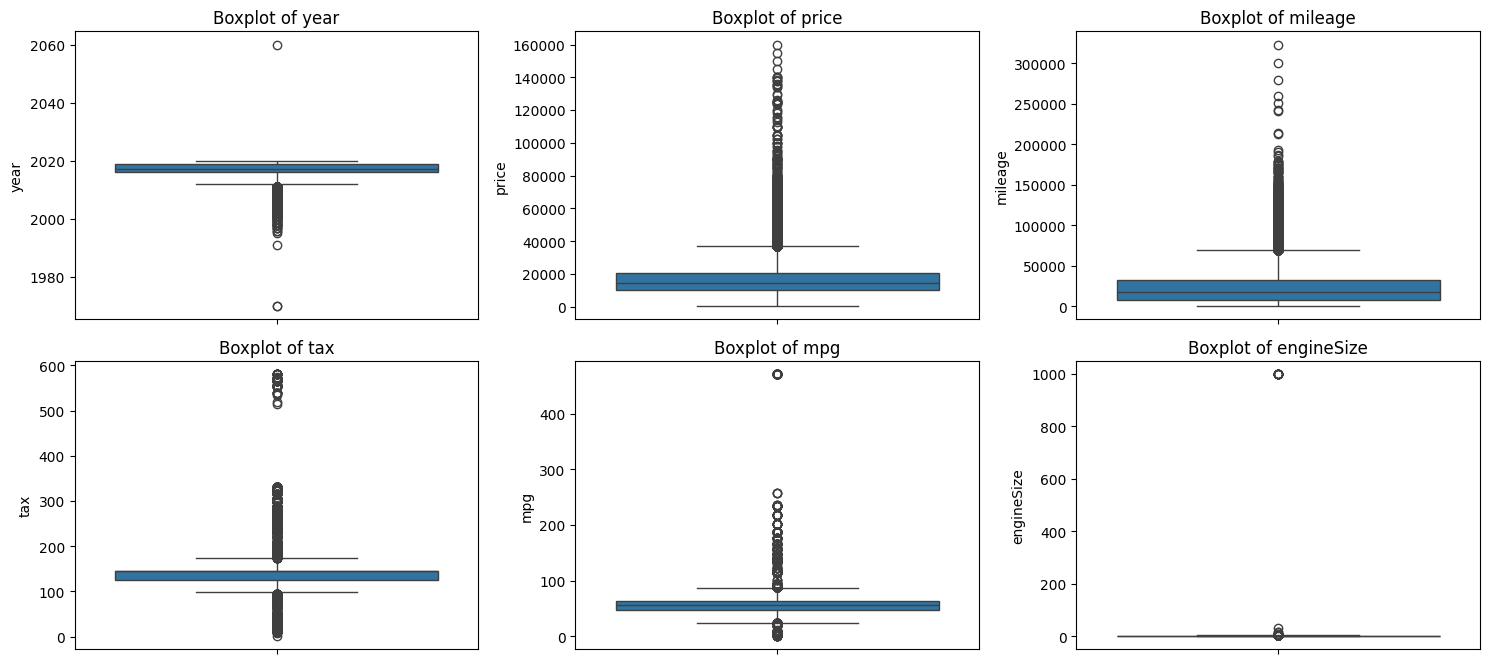

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Outliers in Numerical Data
plt.figure(figsize=(15, 10))
numerical_features = ['year','price', 'mileage', 'tax', 'mpg', 'engineSize']

for i, column in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=Carsdata[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Features to check for outliers
features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
# Function to detect outliers using IQR
def detect_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

# Detect outliers
outliers = detect_outliers(Carsdata, features)
# Display the number of outliers for each feature
outlier_summary = {feature: len(outliers[feature]) for feature in outliers}
outlier_summary


{'year': 1951,
 'price': 4106,
 'mileage': 4366,
 'tax': 29081,
 'mpg': 1061,
 'engineSize': 772}

In [ ]:
# Remove outliers
# Remove outliers in engineSize around 1000 and year (1970, 1991,1995-1997, 2060) as due to less then 3 data entry

cleaned_data = Carsdata[(Carsdata['year'] != 1991) &
                        (Carsdata['year'] != 1995) &
                        (Carsdata['year'] != 1996) &
                        (Carsdata['year'] != 1997) &
                        (Carsdata['year'] != 1970) &
                        (Carsdata['year'] != 2060) &
                        (Carsdata['engineSize'] < 10)]
cleaned_data.describe()


,year,price,mileage,tax,mpg,engineSize
count,108615.0,108615.000000,108615.000000,108615.000000,108615.000000,108615.000000
mean,2017.100888,16890.982894,23014.317893,124.821443,55.461456,1.665237
std,2.108119,9754.004489,21164.641288,58.587715,16.017915,0.551028
min,1998.0,450.000000,1.000000,1.350000,0.300000,0.600000
25%,2016.0,10242.000000,7496.500000,125.000000,47.100000,1.200000
50%,2017.0,14698.000000,17252.000000,145.000000,55.400000,1.600000
75%,2019.0,20905.500000,32227.500000,145.000000,62.800000,2.000000
max,2020.0,159999.000000,323000.000000,580.000000,470.800000,6.600000


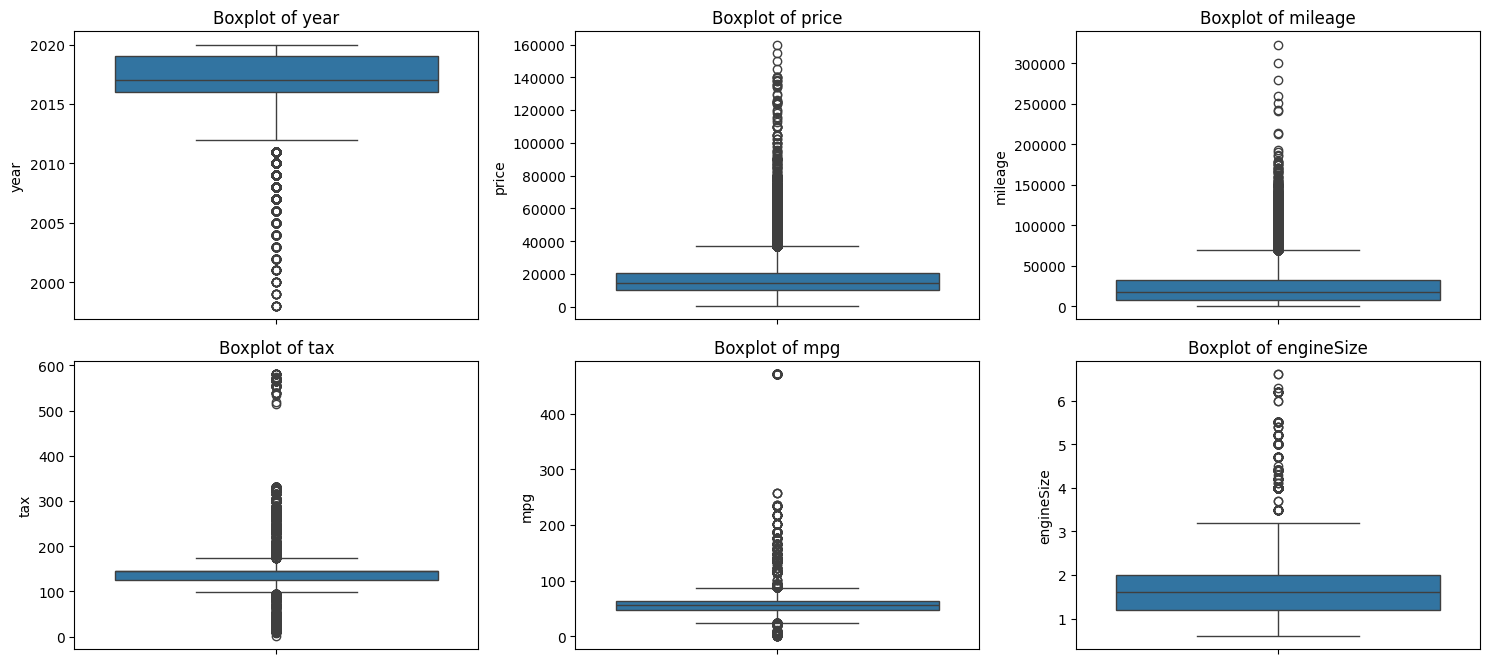

In [ ]:
#after removing outliers(year, enginesize)
# Visualizing Outliers in Numerical Data
plt.figure(figsize=(15, 10))
numerical_features = ['year','price', 'mileage', 'tax', 'mpg', 'engineSize']

for i, column in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=cleaned_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [ ]:
# Count the number of rows where mpg is greater than 400
mpg_outliers_count = (cleaned_data['mpg'] > 400).sum()
mpg_outliers_count


43

In [ ]:
# Count the number of rows where engineSize is greater than 5
es_outliers_count = (cleaned_data['engineSize'] > 6).sum()
es_outliers_count

25

In [ ]:
cleaned_data.head()

,brand,model,year,price,transmission,mileage,tax,mpg,fuelType,engineSize
25320,Audi,A1,2010,9990.0,Automatic,38000.0,125.0,53.3,Petrol,1.4
24479,Audi,A1,2011,6295.0,Manual,107000.0,125.0,53.3,Petrol,1.4
24480,Audi,A1,2011,6995.0,Manual,65000.0,125.0,53.3,Petrol,1.4
24912,Audi,A1,2011,4250.0,Manual,116000.0,20.0,70.6,Diesel,1.6
24923,Audi,A1,2011,7495.0,Manual,60700.0,125.0,53.3,Petrol,1.4


In [ ]:
# Checking exact duplicates
import pandas as pd
import numpy as np

# Find exact duplicate rows
exact_duplicates = cleaned_data[cleaned_data.duplicated(keep=False)]

# Print the number of duplicates found
num_duplicates = len(exact_duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicates
print(exact_duplicates)

cleaned_data = cleaned_data.drop_duplicates()

# Verify removal
print(f"Number of rows after removing duplicates: {len(cleaned_data)}")

Number of duplicate rows: 18989
            brand model  year    price transmission  mileage    tax   mpg  \
18688        Audi    A1  2019  19990.0       Manual   2348.0  145.0  50.4   
19157        Audi    A1  2019  20595.0       Manual   6000.0  145.0  47.9   
19210        Audi    A1  2019  20595.0       Manual   6000.0  145.0  47.9   
19514        Audi    A1  2019  20595.0       Manual   6000.0  145.0  47.9   
19724        Audi    A1  2019  19990.0       Manual   2348.0  145.0  50.4   
...           ...   ...   ...      ...          ...      ...    ...   ...   
44398  Volkswagen    Up  2020  10980.0       Manual    100.0  145.0  54.3   
44399  Volkswagen    Up  2020  10980.0       Manual    100.0  145.0  54.3   
44400  Volkswagen    Up  2020  10980.0       Manual    100.0  145.0  54.3   
44414  Volkswagen    Up  2020  10750.0       Manual    100.0  145.0  54.3   
44432  Volkswagen    Up  2020  10750.0       Manual    100.0  145.0  54.3   

      fuelType  engineSize  
18688   Petrol

In [ ]:
# Inspect data types and summary statistics
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 98531 entries, 25320 to 44597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         98531 non-null  object 
 1   model         98531 non-null  object 
 2   year          98531 non-null  Int64  
 3   price         98531 non-null  float64
 4   transmission  98531 non-null  object 
 5   mileage       98531 non-null  float64
 6   tax           98531 non-null  float64
 7   mpg           98531 non-null  float64
 8   fuelType      98531 non-null  object 
 9   engineSize    98531 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 8.4+ MB
None


In [ ]:
import pandas as pd
Carsdata= pd.read_csv('/content/Clean_Merged_AutomobileData1.csv')
print(Carsdata)

            brand model  year    price transmission  mileage    tax   mpg  \
0            Audi    A1  2010   9990.0    Automatic    38000  125.0  53.3   
1            Audi    A1  2011   6295.0       Manual   107000  125.0  53.3   
2            Audi    A1  2011   6995.0       Manual    65000  125.0  53.3   
3            Audi    A1  2011   4250.0       Manual   116000   20.0  70.6   
4            Audi    A1  2011   7495.0       Manual    60700  125.0  53.3   
...           ...   ...   ...      ...          ...      ...    ...   ...   
98526  Volkswagen    Up  2020  10990.0       Manual     1891  145.0  51.4   
98527  Volkswagen    Up  2020  11990.0       Manual       50  145.0  51.4   
98528  Volkswagen    Up  2020   9690.0       Manual     2277  145.0  54.3   
98529  Volkswagen    Up  2020   9950.0       Manual     1880  145.0  54.3   
98530  Volkswagen    Up  2020  10899.0       Manual     5000  145.0  54.3   

      fuelType  engineSize  
0       Petrol         1.4  
1       Petrol   

In [ ]:
import pandas as pd
Carsdata= pd.read_csv('/content/Clean_Merged_AutomobileData.csv')
print(Carsdata.columns)

Index(['brand', 'model', 'year', 'price', 'transmission', 'mileage', 'tax',
       'mpg', 'fuelType', 'engineSize'],
      dtype='object')


In [ ]:
# Round float columns to 1 decimal point if they have more than 1 decimal point
float_columns = Carsdata.select_dtypes(include=['float64']).columns

# Round the specified columns
Carsdata[float_columns] = Carsdata[float_columns].round(1)

# Apply the conversion to make whole no. to decimal
for column in float_columns:
    Carsdata[column] = Carsdata[column].apply(lambda x: float(f"{x:.1f}"))

Carsdata.head(10)


,brand,model,year,price,transmission,mileage,tax,mpg,fuelType,engineSize
0,Audi,A1,2010,9990.0,Automatic,38000,125.0,53.3,Petrol,1.4
1,Audi,A1,2011,6295.0,Manual,107000,125.0,53.3,Petrol,1.4
2,Audi,A1,2011,6995.0,Manual,65000,125.0,53.3,Petrol,1.4
3,Audi,A1,2011,4250.0,Manual,116000,20.0,70.6,Diesel,1.6
4,Audi,A1,2011,7495.0,Manual,60700,125.0,53.3,Petrol,1.4
5,Audi,A1,2011,6475.0,Manual,45000,27.1,70.6,Diesel,1.6
6,Audi,A1,2012,8999.0,Manual,40572,125.0,53.3,Petrol,1.4
7,Audi,A1,2012,8275.0,Manual,56700,20.0,68.9,Diesel,2.0
8,Audi,A1,2012,9020.0,Automatic,56767,125.0,53.3,Petrol,1.4
9,Audi,A1,2012,8299.0,Manual,76975,20.0,68.9,Diesel,2.0


In [ ]:
Carsdata['mileage'] = pd.to_numeric(Carsdata['mileage'], errors='coerce').astype('Int64')

In [ ]:
# Save the updated DataFrame to a new CSV file
updated_file_path = 'Clean_Merged_AutomobileData1.csv'
Carsdata.to_csv(updated_file_path, index=False)

In [ ]:
#comaparison code for predicitng year (extra)

In [ ]:
#Implementation with XGBregressor for predicting missing year
#Less R2 score
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


# Prepare data for 'year' prediction
data_year = Carsdata.dropna(subset=['year'])  # Drop rows where 'year' is missing
X_year = data_year.drop(columns=['year'])
y_year = data_year['year']

# Encode categorical variables
X_year = pd.get_dummies(X_year)

# Ensure the same columns are in the missing year features
missing_year = Carsdata[Carsdata['year'].isnull()]
missing_year_features = pd.get_dummies(missing_year.drop(columns=['year']))
missing_year_features = missing_year_features.reindex(columns=X_year.columns, fill_value=0)

# Ensure no NaNs are present in the training data
X_year = X_year.fillna(0)
missing_year_features = missing_year_features.fillna(0)

# Split the data into training and testing sets
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_year, y_year, test_size=0.2, random_state=42)

# Train the model
model_year = XGBRegressor(n_estimators=100, random_state=42)
model_year.fit(X_train_year, y_train_year)

# Predict missing 'year' values
predicted_year = model_year.predict(missing_year_features)


# Round the predicted 'year' values and convert to integers
predicted_year = predicted_year.round().astype(int)


# Impute the missing 'year' values
Carsdata.loc[Carsdata['year'].isnull(), 'year'] = predicted_year

# Verify the model performance
print(f"XGBoost Regressor R^2 score for year: {model_year.score(X_test_year, y_test_year)}")

# Print the predicted 'year' values
print("Predicted 'year' values :")
print(predicted_year)






Predicted 'year' values (before rounding):
[2016.5748 2017.82   2018.7009 2017.6954 2017.5505 2017.3734 2015.2233
 2017.8511 2016.2971 2017.9294 2019.1018 2015.9169 2017.9989 2014.0453
 2018.382  2017.3749 2012.0454 2016.1118 2016.508  2018.5155 2016.3738
 2018.1913 2017.82   2017.206  2019.357  2017.5612 2013.5203 2018.275
 2018.6526 2017.5808 2015.727  2018.3523 2018.2518 2018.679  2019.1218
 2018.7932 2017.7625 2018.7831 2018.6537 2018.8319 2019.0253 2018.8575
 2018.8575 2018.789  2017.62   2016.2189 2017.81   2017.809  2016.5273
 2018.8357 2018.5038 2018.5038 2018.5038 2018.8175 2018.8319 2018.402
 2016.3226 2018.6875 2018.6948 2017.3066 2017.5614 2015.7832 2018.1339
 2017.5088 2017.4109 2015.7832 2018.9292 2018.1339 2017.6638 2018.6725
 2018.8535 2018.6384 2019.0154 2018.8491 2018.764  2018.7131 2019.059
 2018.8319 2018.8776 2018.789  2016.6897 2017.2725 2017.5914 2017.5653
 2017.3102 2018.592  2017.7179 2017.7179 2015.3403 2016.4701 2015.4637
 2018.0902]
Predicted 'year' values (

In [ ]:
#Implementation with gradientboosting for predicting missing year
#less   R2 score than randomforest
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


# Prepare data for 'year' prediction
data_year = Carsdata.dropna(subset=['year'])  # Drop rows where 'year' is missing
X_year = data_year.drop(columns=['year'])
y_year = data_year['year']

# Encode categorical variables
X_year = pd.get_dummies(X_year)

# Ensure the same columns are in the missing year features
missing_year = Carsdata[Carsdata['year'].isnull()]
missing_year_features = pd.get_dummies(missing_year.drop(columns=['year']))
missing_year_features = missing_year_features.reindex(columns=X_year.columns, fill_value=0)

# Ensure no NaNs are present in the training data
X_year = X_year.fillna(0)
missing_year_features = missing_year_features.fillna(0)

# Split the data into training and testing sets
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_year, y_year, test_size=0.2, random_state=42)

# Train the model
model_year = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_year.fit(X_train_year, y_train_year)

# Predict missing 'year' values
predicted_year = model_year.predict(missing_year_features)

# Round the predicted 'year' values and convert to integers
predicted_year = predicted_year.round().astype(int)


# Impute the missing 'year' values
Carsdata.loc[Carsdata['year'].isnull(), 'year'] = predicted_year

# Verify the model performance
print(f"Gradient Boosting Regressor R^2 score for year: {model_year.score(X_test_year, y_test_year)}")

# Print the predicted 'year' values
print("Predicted 'year' values (after rounding):")
print(predicted_year)






Gradient Boosting Regressor R^2 score for year: 0.8337686808226207
Predicted 'year' values (after rounding):
[2017 2018 2019 2018 2018 2017 2015 2018 2016 2019 2019 2016 2018 2015
 2019 2017 2013 2016 2017 2018 2017 2018 2018 2016 2019 2018 2014 2018
 2019 2018 2016 2018 2018 2019 2019 2019 2017 2019 2019 2019 2019 2019
 2019 2019 2018 2016 2018 2018 2016 2019 2019 2019 2019 2019 2019 2018
 2016 2019 2019 2017 2018 2016 2018 2018 2018 2016 2019 2018 2018 2019
 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2016 2017 2017 2017
 2017 2019 2018 2018 2015 2017 2016 2018]
model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             1028
mpg              974
engineSize         0
dtype: int64
